#start hear

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/Healthcare Providers.csv'
df = pd.read_csv(file_path)

In [4]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
df.isnull().sum().sum()

104412

#Filling the Null values with some values

In [6]:
df = df.fillna({'Credentials of the Provider':'NA',
                'Gender of the Provider':'NA'})

#Filling the Null values by before values

In [7]:
df = df.fillna({'First Name of the Provider' : 'NA'})
df= df.fillna(method = 'pad',axis = 1)
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,SATYASREE,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,2950 VILLAGE DR,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,JASPER,MD,M,I,5746 N BROADWAY ST,5746 N BROADWAY ST,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,JOAN,PT,F,I,324 E BALTIMORE ST,324 E BALTIMORE ST,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,645 NW 4TH ST,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,DANA,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,RAFAELA,NA,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [8]:
df.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
Street Address 2 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of

In [9]:
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '', regex=False)
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,SATYASREE,MD,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,MD,F,I,2950 VILLAGE DR,2950 VILLAGE DR,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,JASPER,MD,M,I,5746 N BROADWAY ST,5746 N BROADWAY ST,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,JOAN,PT,F,I,324 E BALTIMORE ST,324 E BALTIMORE ST,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,645 NW 4TH ST,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,DANA,MD,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,RAFAELA,NA,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [10]:
# Remove commas from numerical columns
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

In [11]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,SATYASREE,MD,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,1346202256,JONES,WENDY,P,MD,F,I,2950 VILLAGE DR,2950 VILLAGE DR,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,1770523540,FULLARD,JASPER,JASPER,MD,M,I,5746 N BROADWAY ST,5746 N BROADWAY ST,...,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,JOAN,PT,F,I,324 E BALTIMORE ST,324 E BALTIMORE ST,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,645 NW 4TH ST,...,99213,Established patient office or other outpatient...,N,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,8927965,1902868185,VALENCIA,DANA,DANA,MD,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,RAFAELA,NA,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


Here we scaling down the feature

• In the graph above 3 and below 3 values the density is not going to "0"

• In logistic function it is slowly and asintotically get's closer to "0"



#Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Healthcare Providers.csv', encoding='ascii')

# Perform label encoding
label_columns = ['Gender of the Provider', 'Entity Type of the Provider', 'Country Code of the Provider',
                     'HCPCS Drug Indicator', 'Medicare Participation Indicator', 'Place of Service']

label_encoders = {}
def label_encoding(df, columns):
  for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
label_encoding(df,label_columns)

In [14]:
# Perform frequency encoding
freq_columns = ['Provider Type', 'State Code of the Provider', 'Credentials of the Provider', 'HCPCS Code']
def frequency_encoding(df, columns):
    for col in columns:
        freq_enc = df[col].value_counts().to_dict()
        df[col + '_freq'] = df[col].map(freq_enc)
frequency_encoding(df,freq_columns)
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Provider Type_freq,State Code of the Provider_freq,Credentials of the Provider_freq,HCPCS Code_freq
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,0,0,1402 S GRAND BLVD,FDT 14TH FLOOR,...,24,27,200.58777778,305.21111111,157.26222222,160.90888889,11366,1997,32757.0,1297
1,3354385,1346202256,JONES,WENDY,P,M.D.,0,0,2950 VILLAGE DR,NaN,...,175,175,123.73,548.8,118.83,135.31525714,1028,3725,32757.0,243
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,1,0,20 WASHINGTON AVE,STE 212,...,13,32,90.65,155,64.4396875,60.5959375,2027,1403,1330.0,44
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,1,0,5746 N BROADWAY ST,NaN,...,18,20,3.5,5,3.43,3.43,11366,1997,32874.0,460
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,1,0,875 MILITARY TRL,SUITE 200,...,24,31,26.52,40,19.539393939,19.057575758,11366,7263,2478.0,732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,0,0,324 E BALTIMORE ST,NaN,...,20,20,85.3725,214,60.7255,62.2485,2780,4073,800.0,330
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,0,0,645 NW 4TH ST,NaN,...,107,136,61.27,144.05147059,30.006176471,37.040220588,5713,1046,463.0,4578
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,1,0,3009 N BALLAS RD,SUITE 202B,...,11,11,17.98,109.54545455,14.09,14.62,4602,1997,32757.0,75
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,0,0,2365 BOSTON POST RD,SUITE 201,...,12,12,30.54,65,29.93,25.32,11366,6361,NaN,1444


In [15]:
import pandas as pd


# Define categorical columns
categorical_columns = ['Gender of the Provider', 'Entity Type of the Provider', 'Country Code of the Provider',
                     'HCPCS Drug Indicator', 'Medicare Participation Indicator', 'Place of Service']

# Perform one-hot encoding for categorical columns with high cardinality
high_cardinality_columns = ['Provider Type', 'State Code of the Provider', 'Credentials of the Provider', 'HCPCS Code']
df = pd.get_dummies(df, columns=high_cardinality_columns)

# Perform frequency encoding for categorical columns with low cardinality
low_cardinality_columns = ['Gender of the Provider', 'Entity Type of the Provider', 'Country Code of the Provider',
                     'HCPCS Drug Indicator', 'Medicare Participation Indicator', 'Place of Service']

for col in low_cardinality_columns:
    freq_enc = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_enc)

# Print the encoded DataFrame
print(df.head())


     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider  Gender of the Provider  \
0                            NaN                       0   
1                              P                       0   
2                              W                       1   
3                            NaN      

#new columns

In [16]:
df['Full Name'] = df['Last Name/Organization Name of the Provider'].fillna('') + ' ' + \
                  df['First Name of the Provider'].fillna('') + ' ' + \
                  df['Middle Initial of the Provider'].fillna('')


df['Full Name'] = df['Full Name'].str.strip()

print(df[['Full Name']].head())

               Full Name
0  UPADHYAYULA SATYASREE
1          JONES WENDY P
2     DUROCHER RICHARD W
3         FULLARD JASPER
4     PERROTTI ANTHONY E


By combining the last name,first name and middle name this column has been added.

In [17]:
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_columns:
    df[col] = df[col].str.replace(',', '').astype(float)
df['service_to_beneficiary_ratio'] =  df['Number of Medicare Beneficiaries']/df['Number of Services']

print(df[['service_to_beneficiary_ratio']].head())

   service_to_beneficiary_ratio
0                      0.888889
1                      1.000000
2                      0.406250
3                      0.900000
4                      0.727273


Through this ratio we can find the  Quality of Care Assessment.

This has be created by dividing the Number of Medicare Beneficiaries and Number of Services they provided.



In [18]:
low_cardinality_columns = ['Gender of the Provider',
    'Country Code of the Provider',
    'Medicare Participation Indicator',
    'Place of Service',
    'Entity Type of the Provider']

for col in low_cardinality_columns:
    freq_enc = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_enc)

In [19]:
df['Average Submitted Charge Amount'] = pd.to_numeric(df['Average Submitted Charge Amount'], errors='coerce')
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')

# Calculate the ratio
df['Charge to Payment Ratio'] = df['Average Submitted Charge Amount'] / df['Average Medicare Payment Amount']


df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code_V2785,Gender of the Provider_freq,Entity Type of the Provider_freq,Country Code of the Provider_freq,HCPCS Drug Indicator_freq,Medicare Participation Indicator_freq,Place of Service_freq,Full Name,service_to_beneficiary_ratio,Charge to Payment Ratio
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,0,0,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,...,False,29105,95746,99994,93802,99969,38384,UPADHYAYULA SATYASREE,0.888889,1.940778
1,3354385,1346202256,JONES,WENDY,P,0,0,2950 VILLAGE DR,NaN,FAYETTEVILLE,...,False,29105,95746,99994,93802,99969,61616,JONES WENDY P,1.000000,4.618362
2,3001884,1306820956,DUROCHER,RICHARD,W,1,0,20 WASHINGTON AVE,STE 212,NORTH HAVEN,...,False,66641,95746,99994,93802,99969,61616,DUROCHER RICHARD W,0.406250,2.405350
3,7594822,1770523540,FULLARD,JASPER,NaN,1,0,5746 N BROADWAY ST,NaN,KANSAS CITY,...,False,66641,95746,99994,93802,99969,61616,FULLARD JASPER,0.900000,1.457726
4,746159,1073627758,PERROTTI,ANTHONY,E,1,0,875 MILITARY TRL,SUITE 200,JUPITER,...,False,66641,95746,99994,93802,99969,61616,PERROTTI ANTHONY E,0.727273,2.047146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,0,0,324 E BALTIMORE ST,NaN,WILMINGTON,...,False,29105,95746,99994,93802,99969,61616,PAPES JOAN,1.000000,3.524055
99996,2079360,1215091327,HAYNER,MARGARET,S,0,0,645 NW 4TH ST,NaN,REDMOND,...,False,29105,95746,99994,93802,99969,61616,HAYNER MARGARET S,0.786765,4.800727
99997,8927965,1902868185,VALENCIA,DANA,NaN,1,0,3009 N BALLAS RD,SUITE 202B,SAINT LOUIS,...,False,66641,95746,99994,93802,99969,38384,VALENCIA DANA,1.000000,7.774695
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,0,0,2365 BOSTON POST RD,SUITE 201,LARCHMONT,...,False,29105,95746,99994,93802,99969,61616,GONZALEZ-LAMOS RAFAELA,1.000000,2.171734


The "Charge to Payment Ratio column" is created by dividing the 'Average Submitted Charge Amount' by the 'Average Medicare Payment Amount'.

This has been create to the Evaluate Cost Efficiency.

In [20]:
# prompt: pront coliumns

print(df.columns)


Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Gender of the Provider', 'Entity Type of the Provider',
       'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
       'City of the Provider',
       ...
       'HCPCS Code_V2785', 'Gender of the Provider_freq',
       'Entity Type of the Provider_freq', 'Country Code of the Provider_freq',
       'HCPCS Drug Indicator_freq', 'Medicare Participation Indicator_freq',
       'Place of Service_freq', 'Full Name', 'service_to_beneficiary_ratio',
       'Charge to Payment Ratio'],
      dtype='object', length=4669)


#Normalization


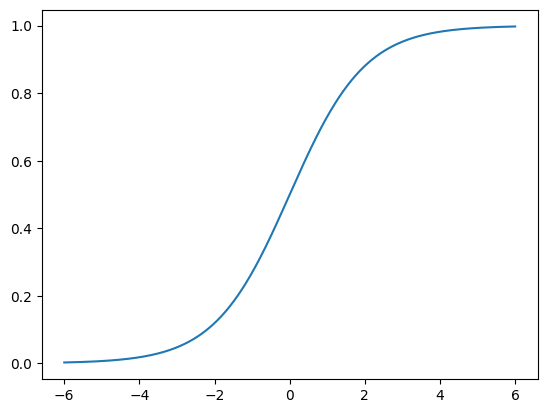

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def logistic(x):
  return 1.0/(1+np.exp(-x))
x = np.linspace(-6,6,1000)
y = logistic(x)
plt.plot(x,y)
plt.show()


Here we scaling down the feature between 0 to 1

In [22]:
print(df.columns)

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Gender of the Provider', 'Entity Type of the Provider',
       'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
       'City of the Provider',
       ...
       'HCPCS Code_V2785', 'Gender of the Provider_freq',
       'Entity Type of the Provider_freq', 'Country Code of the Provider_freq',
       'HCPCS Drug Indicator_freq', 'Medicare Participation Indicator_freq',
       'Place of Service_freq', 'Full Name', 'service_to_beneficiary_ratio',
       'Charge to Payment Ratio'],
      dtype='object', length=4669)


• In the above dataset we are having 6
numerical columns and I have just done Normalization for 4 numerical columns.

• Normalization applyed on the Number of Average Medicare Allowed Amount, Average Submitted Charge Amount, Average Medicare Payment Amount, and Average Medicare Standardized Amount.

• Here the maximum value is 1 and the minimum value is 0.

•Insted of using minmax scaller we use Standardization caues in it is very effective to find the outliers than this.

#Standardization

• In Standardization the features will be transformed in such a way that will have the properties of a standard normal distribution.

• mean is usually "0" and the standard deviation is "1".

In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Remove commas from numerical columns
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for col in numerical_columns:
    if df[col].dtype == 'object':  # Check if the column is of object type (likely string)
        df[col] = df[col].str.replace(',', '').astype(float)
scaler = StandardScaler()

x_scaled = scaler.fit_transform(df[[
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount']])

print(x_scaled)

[[ 0.38544957 -0.04643253  0.40008162  0.41429889]
 [ 0.08667282  0.18280539  0.207649    0.28635917]
 [-0.0419223  -0.18779399 -0.06468681 -0.0871544 ]
 ...
 [-0.32441949 -0.23057059 -0.31679095 -0.316983  ]
 [-0.27559378 -0.27249167 -0.23747904 -0.26349489]
 [-0.24425726 -0.28955583 -0.23844603 -0.26053486]]


In [27]:
#mean value
np.mean(x_scaled)

2.0339285811132868e-17

In [28]:
# varience
np.var(x_scaled)

1.0000000000000002

# PCA

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


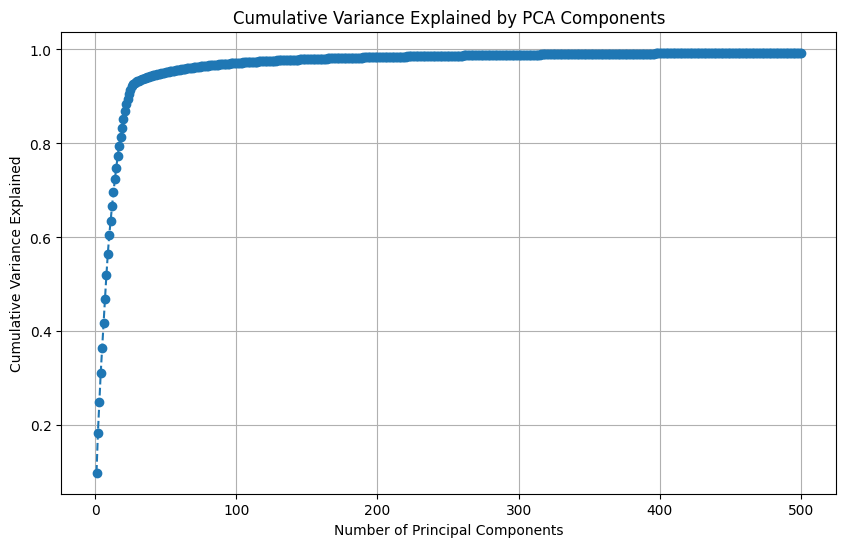

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
df_cleaned = df.copy()

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Separate categorical columns based on cardinality
low_cardinality_cols = [col for col in categorical_columns if df_cleaned[col].nunique() <= 10]
high_cardinality_cols = [col for col in categorical_columns if df_cleaned[col].nunique() > 10]

# One-hot encode low cardinality columns
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_cleaned[low_cardinality_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(low_cardinality_cols))

# Frequency encode high cardinality columns
for col in high_cardinality_cols:
    freq_encoding = df_cleaned[col].value_counts() / len(df_cleaned)
    df_cleaned[col] = df_cleaned[col].map(freq_encoding)

# Drop the original low cardinality categorical columns as they are now encoded
df_cleaned = df_cleaned.drop(columns=low_cardinality_cols)

# Concatenate the one-hot encoded columns with the cleaned dataframe
df_encoded = pd.concat([df_cleaned.reset_index(drop=True), onehot_encoded_df], axis=1)

# Identify numerical columns for scaling
numerical_columns = df_encoded.select_dtypes(include=[np.number]).columns

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[numerical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Combine scaled data with non-numerical columns (which are already encoded and scaled)
final_df = pd.concat([scaled_df.reset_index(drop=True), df_encoded.drop(columns=numerical_columns).reset_index(drop=True)], axis=1)

# Check and handle infinite values
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values (NaNs) with the mean of each column in chunks
def impute_in_chunks(dataframe, chunk_size=1000):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = []

    for start in range(0, dataframe.shape[0], chunk_size):
        end = min(start + chunk_size, dataframe.shape[0])
        chunk = dataframe.iloc[start:end]
        imputed_chunk = imputer.fit_transform(chunk)
        imputed_data.append(imputed_chunk)

    return np.vstack(imputed_data)

final_df_imputed = pd.DataFrame(impute_in_chunks(final_df), columns=final_df.columns)

# Ensure the number of components does not exceed the batch size
n_samples = final_df_imputed.shape[0]
n_features = final_df_imputed.shape[1]
n_components = min(n_samples, n_features, 500)  # Ensure n_components <= batch_size and reasonable value

incremental_pca = IncrementalPCA(n_components=n_components, batch_size=1000)
incremental_pca.fit(final_df_imputed)

# Calculate cumulative variance explained
cumulative_variance_explained = np.cumsum(incremental_pca.explained_variance_ratio_)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'City of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Drug Indicator']
numerical_cols = ['Number of Services', 'Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [31]:

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Combine numerical and encoded categorical columns
combined_columns = numerical_columns + list(df.filter(like='_freq').columns)

# Apply StandardScaler to combined columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[combined_columns])

# Print the scaled data
print(x_scaled)


[[-0.08530146 -0.05930843 -0.07018311 ...  0.25705126  0.01760955
  -1.26698547]
 [-0.02593939  0.07677525  0.02004874 ...  0.25705126  0.01760955
   0.78927503]
 [-0.08329598 -0.06922181 -0.06713474 ...  0.25705126  0.01760955
   0.78927503]
 ...
 [-0.09171898 -0.07102425 -0.07993791 ...  0.25705126  0.01760955
  -1.26698547]
 [-0.09131788 -0.07012303 -0.07932823 ...  0.25705126  0.01760955
   0.78927503]
 [ 0.14011396 -0.01244518  0.2712347  ...  0.25705126  0.01760955
   0.78927503]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.70579907e+02 7.76728356e+01 1.01572721e+02 3.55037563e+02
  7.74636301e+01 7.81361359e+01]
 [1.88949762e+05 8.60543750e+04 1.60796917e+01 4.45365374e+01
  1.55292706e+01 1.60717600e+01]
 [3.95787423e+04 3.91587591e+03 5.42200268e+00 1.76129332e+01
  4.55853711e+00 4.79469908e+00]]


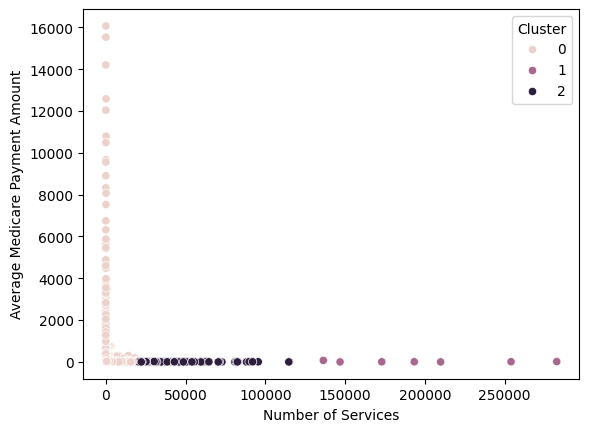

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

kmeans.fit(df[numerical_cols])

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Print the cluster centers
print(kmeans.cluster_centers_)

# Visualize the clusters
sns.scatterplot(x='Number of Services', y='Average Medicare Payment Amount', hue='Cluster', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.01142696e-02  3.10782890e-03  1.01514406e-02 -1.26973312e-01
  -1.76568912e-01 -1.28276659e-01 -1.26962117e-01 -7.64844469e-02
   2.33034908e-02 -1.10869011e-01  1.25159057e-01 -9.65122024e-02
  -6.59563408e-02  1.38582428e-03 -1.61331882e-01 -1.03759638e-02
   7.87282728e-01]
 [ 7.86574381e+01  1.22175742e+02  1.19555426e+02 -3.01372798e-01
  -2.70764627e-01 -2.70058976e-01 -2.68486338e-01 -8.93800705e-01
   2.94924726e-01  7.48898919e-17 -5.35665873e-01 -2.46750688e+00
  -4.74418457e+00  7.74619908e-03  2.57051260e-01  1.76095466e-02
   7.89275032e-01]
 [-5.69567409e-02 -2.04630788e-02 -3.10973876e-02  1.97780612e-01
   2.75014479e-01  1.99806377e-01  1.97758973e-01  1.19227460e-01
  -3.63294390e-02  1.72662017e-01 -1.94848144e-01  1.50618951e-01
   1.03323862e-01 -2.15920603e-03  2.51217575e-01  1.61567707e-02
  -1.22617685e+00]]


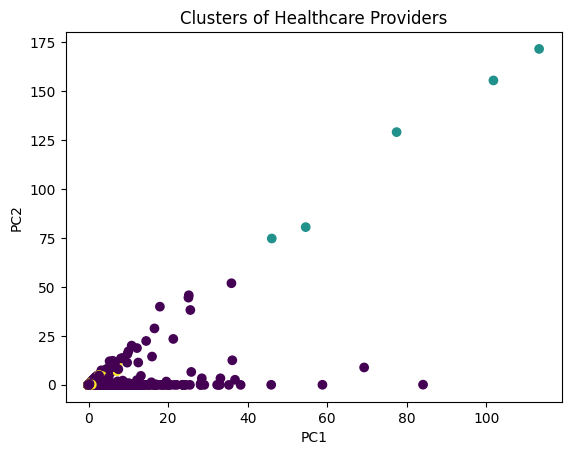

In [60]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.impute import SimpleImputer

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0)

imputer = SimpleImputer(strategy='mean')
x_scaled_imputed = imputer.fit_transform(x_scaled)

kmeans.fit(x_scaled_imputed)

labels = kmeans.labels_

df['Cluster'] = labels

print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

plt.scatter(x_scaled_imputed[:, 0], x_scaled_imputed[:, 1], c=labels, cmap='viridis')
plt.title('Clusters of Healthcare Providers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


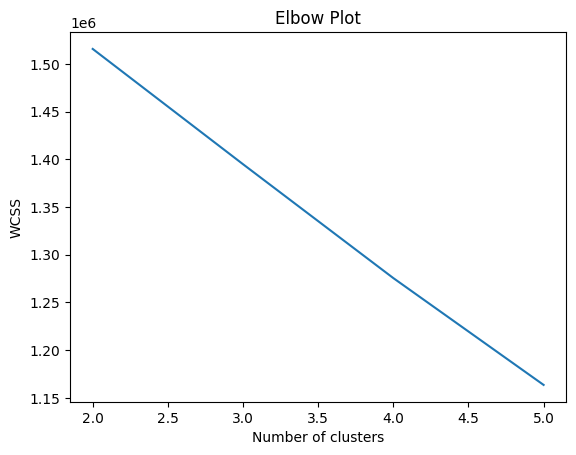

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=0)

    # Fit the model to the data
    kmeans.fit(x_scaled_imputed)

    wcss.append(kmeans.inertia_)

plt.plot(range(2, 6), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=0)

# Fit the model to the data
kmeans.fit(x_scaled_imputed)

df['Cluster'] = kmeans.labels_



[[ 3.01142696e-02  3.10782890e-03  1.01514406e-02 -1.26973312e-01
  -1.76568912e-01 -1.28276659e-01 -1.26962117e-01 -7.64844469e-02
   2.33034908e-02 -1.10869011e-01  1.25159057e-01 -9.65122024e-02
  -6.59563408e-02  1.38582428e-03 -1.61331882e-01 -1.03759638e-02
   7.87282728e-01]
 [ 7.86574381e+01  1.22175742e+02  1.19555426e+02 -3.01372798e-01
  -2.70764627e-01 -2.70058976e-01 -2.68486338e-01 -8.93800705e-01
   2.94924726e-01  7.48898919e-17 -5.35665873e-01 -2.46750688e+00
  -4.74418457e+00  7.74619908e-03  2.57051260e-01  1.76095466e-02
   7.89275032e-01]
 [-5.69567409e-02 -2.04630788e-02 -3.10973876e-02  1.97780612e-01
   2.75014479e-01  1.99806377e-01  1.97758973e-01  1.19227460e-01
  -3.63294390e-02  1.72662017e-01 -1.94848144e-01  1.50618951e-01
   1.03323862e-01 -2.15920603e-03  2.51217575e-01  1.61567707e-02
  -1.22617685e+00]]


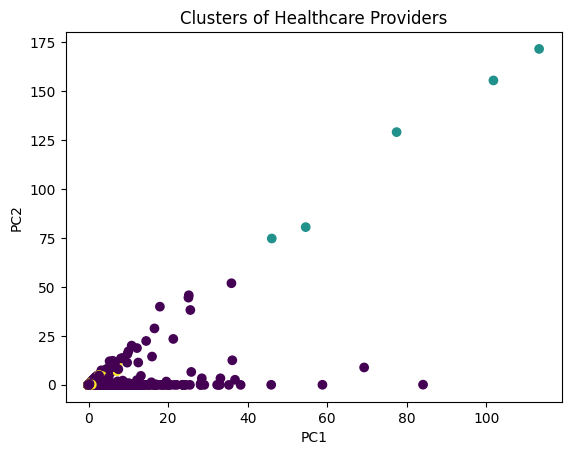

In [29]:
print(kmeans.cluster_centers_)

# Visualize the clusters
plt.scatter(x_scaled_imputed[:, 0], x_scaled_imputed[:, 1], c=labels, cmap='viridis')
plt.title('Clusters of Healthcare Providers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical columns for k-means clustering
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Extract the data for these columns from 'df'
data_for_clustering = df[numerical_columns]

# Handle any missing values by filling them with the mean of the column
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

# Standardize the data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Perform k-means clustering with a chosen number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, random_state=42)

# Assign the clusters to the original dataframe 'df'
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Show the number of data points in each cluster
df['Cluster'].value_counts()

<ipython-input-30-668516996e00>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    99898
2       97
1        5
Name: count, dtype: int64

In [61]:
import pandas as pd
pd.DataFrame(data_scaled).head().T

,0,1,2,3,4
0,-0.085301,-0.025939,-0.083296,-0.088109,-0.082895
1,-0.059308,0.076775,-0.069222,-0.064716,-0.059308
2,-0.070183,0.020049,-0.067135,-0.074451,-0.067744
3,0.385450,0.086673,-0.041922,-0.380709,-0.291221
4,-0.046433,0.182805,-0.187794,-0.328957,-0.296019
5,0.400082,0.207649,-0.064687,-0.370166,-0.289505
6,0.414299,0.286359,-0.087154,-0.372921,-0.294800
